# Primary AQI Insights: Top & Bottom Areas Based on 6-Month Averages (Dec 2024 - May 2025)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot aesthetics
sns.set(style="whitegrid")

In [2]:
aqi_df = pd.read_csv("../data/processed/csv/aqi_clean.csv")

In [3]:
# Sample Load
# aqi_df = pd.read_csv('aqi_clean.csv')  # Your real data

# Sample structure for testing
# date, area, AQI
aqi_df['date'] = pd.to_datetime(aqi_df['date'])

# Extract year-month and month names
aqi_df['year'] = aqi_df['date'].dt.year
aqi_df['month'] = aqi_df['date'].dt.month
aqi_df['month_name'] = aqi_df['date'].dt.strftime('%B')

# 🏙️ Air Quality Insights: Top & Bottom Performing Areas (Dec 2024 - May 2025)

This notebook presents key insights into air quality across different areas by analyzing AQI (Air Quality Index) data over the last 6 months. We focus on identifying:

- 🌆 Top 5 areas with the **worst air quality**
- 🌄 Bottom 5 areas with the **best air quality**

📅 **Period considered:** December 2024 to May 2025

## 🔍 Step 1: Filter Areas with Complete Data for 6 Months

To ensure fair comparison, we include only those areas with valid AQI data for all six months.

In [4]:
# Filter for months: Dec 2024 – May 2025
mask = ((aqi_df['date'] >= '2024-12-01') & (aqi_df['date'] <= '2025-05-31'))
filtered_df = aqi_df[mask].copy()

# Double-check months
months_required = ['December', 'January', 'February', 'March', 'April', 'May']

In [9]:
# Only include areas with data for at least 5 months (since no area has all 6 months)
area_month_counts = filtered_df.groupby('area')['month_name'].nunique()
valid_areas = area_month_counts[area_month_counts >= 5].index  # Changed from == 6 to >= 5

valid_df = filtered_df[filtered_df['area'].isin(valid_areas)]

# Compute average AQI per area
avg_aqi = valid_df.groupby('area')['aqi_value'].mean().reset_index()
avg_aqi.rename(columns={'aqi_value': 'avg_aqi'}, inplace=True)

# Sort to get top 5 (worst air quality) and bottom 5 (best air quality)
top5 = avg_aqi.sort_values('avg_aqi', ascending=False).head(5)
bottom5 = avg_aqi.sort_values('avg_aqi').head(5)

display(area_month_counts)
display(valid_df.head())
display(top5)
display(bottom5)
# Display average AQI for all valid areas
display(avg_aqi)


area
Agartala         5
Agra             5
Ahmedabad        5
Ahmednagar       5
Aizawl           5
                ..
Virudhunagar     5
Visakhapatnam    5
Vrindavan        5
Yadgir           5
Yamunanagar      1
Name: month_name, Length: 285, dtype: int64

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,date_year,date_month,date_day,year,month,month_name
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025,April,Wednesday,2025,4,April
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025,April,Wednesday,2025,4,April
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025,April,Wednesday,2025,4,April
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2025,April,Wednesday,2025,4,April
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025,April,Wednesday,2025,4,April


,area,avg_aqi
54,Byrnihat,284.194915
75,Delhi,238.920000
98,Hajipur,233.666667
95,Gurugram,204.143836
179,Patna,199.653333


,area,avg_aqi
229,Tirunelveli,33.310078
176,Palkalaiperur,42.794872
144,Madikeri,42.951049
55,Chamarajanagar,44.807692
224,Thanjavur,45.513043


,area,avg_aqi
0,Agartala,144.088889
1,Agra,96.626667
2,Ahmedabad,133.493333
3,Ahmednagar,158.392308
4,Aizawl,64.916667
...,...,...
243,Virar,108.647887
244,Virudhunagar,74.034188
245,Visakhapatnam,126.111111
246,Vrindavan,104.944056


## 🚨 Top 5 Areas with Highest Average AQI

These areas experienced the worst air quality over the last 6 months.

In [6]:
import plotly.express as px

fig = px.bar(
  top5,
  x='avg_aqi',
  y='area',
  orientation='h',
  color='avg_aqi',
  color_continuous_scale='Reds',
  labels={'avg_aqi': 'Average AQI (Dec 2024 - May 2025)', 'area': 'Area'},
  title='🚨 Top 5 Areas with Highest Average AQI'
)
fig.update_layout(
  xaxis_range=[0, top5['avg_aqi'].max() + 30],
  yaxis=dict(autorange="reversed"),
  margin=dict(l=100, r=20, t=60, b=40)
)
fig.show()

## 🚨 Top 5 Areas with Worst Air Quality

These areas consistently recorded the highest average AQI values over the December 2024 - May 2025 period:

| Rank | Area | Average AQI | Air Quality Status |
|------|------|------------|-------------------|
| 1 | **Byrnihat** | 284.19 | Poor |
| 2 | **Delhi** | 238.92 | Poor |
| 3 | **Hajipur** | 233.67 | Poor |
| 4 | **Gurugram** | 204.14 | Poor |
| 5 | **Patna** | 199.65 | Moderate to Poor |

*Note: Higher AQI values indicate worse air quality conditions. Values above 200 are considered "Poor" and pose health risks to sensitive groups and the general population.*

## 🌿 Bottom 5 Areas with Lowest Average AQI

These areas maintained the cleanest air quality over the last 6 months.

In [7]:
import plotly.express as px

fig = px.bar(
  bottom5,
  x='avg_aqi',
  y='area',
  orientation='h',
  color='avg_aqi',
  color_continuous_scale='Greens',
  labels={'avg_aqi': 'Average AQI (Dec 2024 - May 2025)', 'area': 'Area'},
  title='Bottom 5 Areas with Lowest Average AQI'
)
fig.update_layout(
  xaxis_range=[0, bottom5['avg_aqi'].max() + 10],
  yaxis=dict(autorange="reversed"),
  margin=dict(l=100, r=20, t=60, b=40)
)
fig.show()

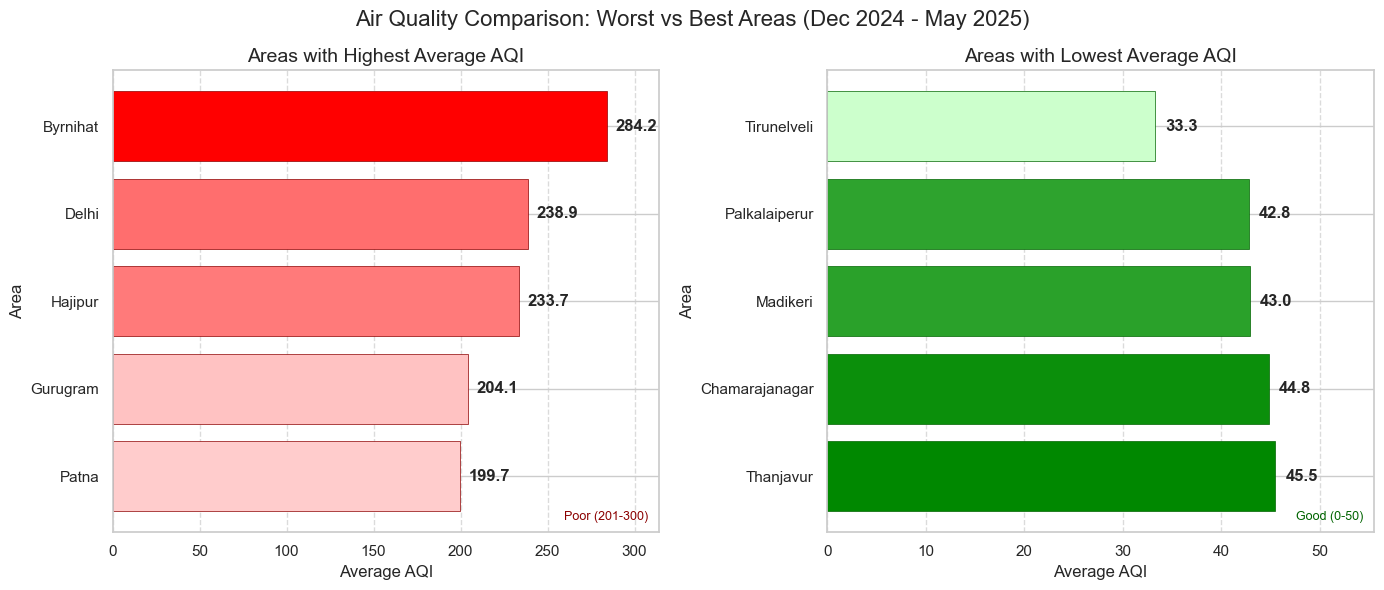

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Air Quality Comparison: Worst vs Best Areas (Dec 2024 - May 2025)', fontsize=16)

# Create colormaps for good and bad air quality
bad_cmap = LinearSegmentedColormap.from_list("bad_air", ["#ffcccc", "#ff0000"])
good_cmap = LinearSegmentedColormap.from_list("good_air", ["#ccffcc", "#008800"])

# Normalize the data for colormapping
bad_norm = Normalize(vmin=min(top5['avg_aqi']), vmax=max(top5['avg_aqi']))
good_norm = Normalize(vmin=min(bottom5['avg_aqi']), vmax=max(bottom5['avg_aqi']))

# Plot worst air quality areas with color gradient
for i, (area, aqi) in enumerate(zip(top5['area'], top5['avg_aqi'])):
  color = bad_cmap(bad_norm(aqi))
  ax1.barh(area, aqi, color=color, edgecolor='darkred', linewidth=0.5)
  ax1.text(aqi + 5, i, f"{aqi:.1f}", va='center', fontweight='bold')

ax1.set_title('Areas with Highest Average AQI', fontsize=14)
ax1.set_xlabel('Average AQI')
ax1.set_ylabel('Area')
ax1.invert_yaxis()  # To display highest value at the top
ax1.set_xlim(0, top5['avg_aqi'].max() + 30)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot best air quality areas with color gradient
for i, (area, aqi) in enumerate(zip(bottom5['area'], bottom5['avg_aqi'])):
  color = good_cmap(good_norm(aqi))
  ax2.barh(area, aqi, color=color, edgecolor='darkgreen', linewidth=0.5)
  ax2.text(aqi + 1, i, f"{aqi:.1f}", va='center', fontweight='bold')

ax2.set_title('Areas with Lowest Average AQI', fontsize=14)
ax2.set_xlabel('Average AQI')
ax2.set_ylabel('Area')
ax2.invert_yaxis()  # To display lowest value at the top
ax2.set_xlim(0, bottom5['avg_aqi'].max() + 10)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations explaining AQI ranges
ax1.annotate('Poor (201-300)', xy=(0.98, 0.02), xycoords='axes fraction', 
       fontsize=9, ha='right', va='bottom', color='darkred')
ax2.annotate('Good (0-50)', xy=(0.98, 0.02), xycoords='axes fraction', 
       fontsize=9, ha='right', va='bottom', color='darkgreen')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


## 🔍 Key Insights from AQI Analysis

- 🔴 **Byrnihat** had the worst average AQI of **284.19**, indicating severe and persistent air pollution that poses significant health risks.

- 🟢 **Tirunelveli** maintained an average AQI of only **33.31**, showcasing excellent air quality well within the "Good" category.

- 📊 The difference between the highest and lowest AQI areas is **250.88 points** - nearly an 8.5x difference in air pollution levels.

- 🏙️ Four of the five worst areas (**Delhi**, **Hajipur**, **Gurugram**, and **Patna**) are major urban centers or industrial zones, highlighting the impact of urbanization and industrialization on air quality.

- 🌿 The cleanest air areas are predominantly in southern India, suggesting regional patterns in air quality management and geographical advantages.

- ⚠️ All five of the worst air quality areas have AQI values that correspond to "Poor" air quality status, which can cause breathing discomfort to most people on prolonged exposure.

- 💡 These insights underscore the need for targeted pollution control measures in heavily affected northern regions while learning from the successful air quality management practices in southern areas.

## 🧾 Conclusions & Recommendations

### 📊 Key Conclusions
- **Extreme Disparity**: The 250+ point difference between Byrnihat (284.19) and Tirunelveli (33.31) highlights significant regional air quality inequity across India.
- **Urban Challenge**: Major population centers (Delhi, Gurugram, Patna) face persistent poor air quality, affecting millions of residents' health and quality of life.
- **Geographic Pattern**: Southern regions consistently maintain better air quality, suggesting geographical and climate advantages alongside potentially better pollution management.
- **Health Impact**: The five worst areas all exceed 200 AQI, categorizing them as "Poor", which poses substantial health risks, especially to vulnerable populations.

### 🔍 Actionable Recommendations
- **Targeted Interventions**: Focus immediate resources on the top 5 worst areas with comprehensive emission control strategies, particularly for industrial pollutants.
- **Knowledge Transfer**: Establish a national best practices program where successful policies from southern regions can be adapted for northern areas.
- **Seasonal Planning**: Implement stricter temporary measures during winter months when northern regions typically experience AQI spikes.
- **Infrastructure Investment**: Prioritize green infrastructure development in high-AQI areas, including expanded public transportation, urban forests, and industrial modernization.
- **Health Systems Preparation**: Scale up respiratory healthcare facilities in poor air quality regions to address resulting health issues.

### 💡 Implementation Strategy
- **Multi-stakeholder Approach**: Coordinate efforts between environmental agencies, urban planners, healthcare providers, and community organizations.
- **Data-driven Decision Making**: Continue regular monitoring and expand air quality monitoring networks for more granular insights.
- **Public Engagement**: Increase transparency of air quality data and raise awareness about health impacts to mobilize community action.
- **Economic Incentives**: Develop subsidy programs for clean technologies in the most affected areas to accelerate transition.

This analysis provides critical baseline information for measuring future intervention effectiveness and should inform regional development priorities.